In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
df = pd.read_csv("./datasets/Shoe prices.csv")

In [57]:
df

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh,$130.00
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh,$160.00
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather,$70.00
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh,$55.00


In [58]:
## printing the head of the data
df.head()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [59]:
## printing the tail of the data
df.tail()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh,$130.00
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh,$160.00
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather,$70.00
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh,$55.00
1005,Nike,Air Max 97,Running,Women,US 7.5,Silver,Leather,$170.00


In [60]:
## getting the information of how our dataframe is comprised of
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [61]:
### lower casing all the columns in dataframe
df.columns = [columns.lower() for columns in df.columns]

In [62]:
df.columns

Index(['brand', 'model', 'type', 'gender', 'size', 'color', 'material',
       'price (usd)'],
      dtype='object')

In [63]:
## considering the price of the shoe is in USD ($), lets remove (usd) from the column name
df = df.rename(
    columns = {
        'price (usd)' : "price"
    }
)

In [64]:
## checking for the null values in the dataframe
df.isna()

,brand,model,type,gender,size,color,material,price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1001,False,False,False,False,False,False,False,False
1002,False,False,False,False,False,False,False,False
1003,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False


In [65]:
## seeing if we have any null values in the dataframe by adding them up
df.isna().sum()

brand       0
model       0
type        0
gender      0
size        0
color       0
material    0
price       0
dtype: int64

In [66]:
## checking for the unique values in each columns of the dataframe
df.nunique()

brand        10
model       239
type         18
gender        2
size         13
color        82
material     34
price        33
dtype: int64

In [67]:
df.describe()

,brand,model,type,gender,size,color,material,price
count,1006,1006,1006,1006,1006,1006,1006,1006
unique,10,239,18,2,13,82,34,33
top,Nike,Sk8-Hi,Running,Men,US 8.5,Black,Mesh,$65.00
freq,118,39,332,535,132,178,308,121


In [68]:
## since we have most of the categorical data, lets get the statistical summary of the price column
type(df["price"][0])

## since our price column is string, we can remove "$" sign to make it numerical column as we have already considered that the 
## price of the shoes are in USD 

df["price"] = [price.replace("$","").strip() for price in df["price"]]


In [69]:
df["price"] = pd.to_numeric(df["price"])

In [72]:
df["size"] = [size.replace("US","").strip() for size in df["size"]]
df["size"] =  pd.to_numeric(df["size"])

In [74]:
## getting the statistical summary of the dataframe using describe method which helps us to get the understanding of the data present in each columns

df.describe()

,size,price
count,1006.000000,1006.000000
mean,8.912028,101.306143
std,1.449297,39.215451
min,6.000000,25.000000
25%,8.000000,70.000000
50%,9.000000,90.000000
75%,10.000000,130.000000
max,12.000000,250.000000


In [73]:
df.head(10)

,brand,model,type,gender,size,color,material,price
0,Nike,Air Jordan 1,Basketball,Men,10.0,Red/Black,Leather,170.0
1,Adidas,Ultra Boost 21,Running,Men,9.5,Black,Primeknit,180.0
2,Reebok,Classic Leather,Casual,Men,11.0,White,Leather,75.0
3,Converse,Chuck Taylor,Casual,Women,8.0,Navy,Canvas,55.0
4,Puma,Future Rider,Lifestyle,Women,7.5,Pink,Mesh,80.0
5,Vans,Old Skool,Skate,Men,8.5,Black/White,Suede/Canvas,65.0
6,New Balance,990v5,Running,Women,6.5,Grey,Suede/Mesh,175.0
7,Asics,Gel-Kayano 28,Running,Men,10.5,Blue,Mesh,160.0
8,Fila,Disruptor II,Fashion,Women,9.0,White,Leather/Synthetic,65.0
9,Skechers,Go Run Razor 3,Running,Men,9.0,Black,Mesh,110.0


In [77]:
df["brand"].value_counts()

brand
Nike           118
Adidas         100
Reebok         100
Converse       100
Puma           100
Vans           100
New Balance    100
Asics          100
Fila            99
Skechers        89
Name: count, dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   brand     1006 non-null   object 
 1   model     1006 non-null   object 
 2   type      1006 non-null   object 
 3   gender    1006 non-null   object 
 4   size      1006 non-null   float64
 5   color     1006 non-null   object 
 6   material  1006 non-null   object 
 7   price     1006 non-null   float64
dtypes: float64(2), object(6)
memory usage: 63.0+ KB


In [87]:
## seperating the numerical and categorical columns 
categorical_columns = df.select_dtypes(include = ["object"]).columns
categorical_columns

Index(['brand', 'model', 'type', 'gender', 'color', 'material'], dtype='object')

In [91]:
numerical_columns = df.select_dtypes(include = np.number).columns.tolist()
numerical_columns

## seperating the numeric and categorical columns is important because 
## it helps us to allow for more focused and effective analysis of data which lead to better insight and decision during EDA

['size', 'price']

size
Skew : 0.14


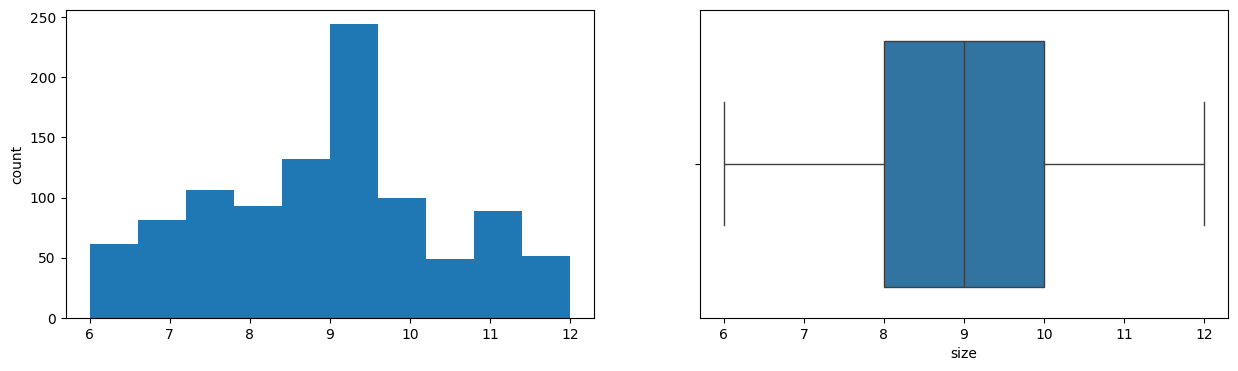

price
Skew : 0.89


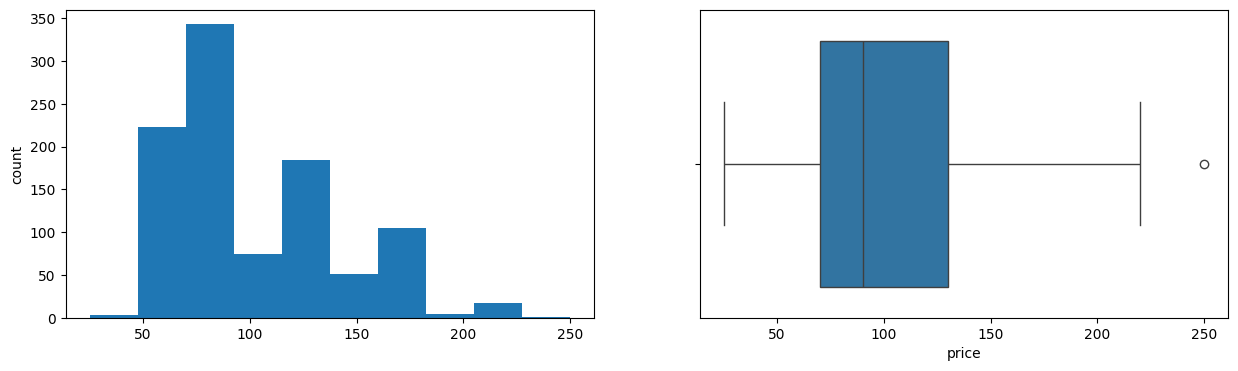

In [95]:
for col in numerical_columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()